# Quantitative Analysis Tool

#### QuantitativeAnalysisTool designed to help users analyze datasets efficiently.

It provides methods for:

- **Data Preprocessing**: Scales numerical data for consistency.
- **Principal Component Analysis (PCA)**: Reduces dimensionality and visualizes

1.   List item
2.   List item

data patterns.
- **Correlation Analysis**: Generates a heatmap to reveal relationships between variables.
- **Regression Analysis**: Performs linear regression between two selected columns.
- **Time Series Analysis**: Uses an ARIMA model to analyze trends in time-dependent data

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

Load dataset from sklearn.datasets

In [64]:
from sklearn.datasets import load_diabetes

Load the dataset

In [84]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
print(df.columns)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


This method checks if the input is a DataFrame and stores it for further analysis.

In [66]:
def initialize_data(data):
  if not isinstance(data, pd.DataFrame):
    raise ValueError("Data must be a pandas DataFrame.")
  return {"data": data, "scaled_data": None}

In [67]:
initialize_data = initialize_data(df)

This method applies standard scaling (zero mean, unit variance) to the dataset.

It ensures that all features contribute equally to the analysis.

In [68]:
def preprocess_data(data):
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)

  print("Data successfully scaled.")
  return scaled_data

In [69]:
initialize_data["scaled_data"] = preprocess_data(df)

Data successfully scaled.


## Principal Component Analysis (PCA)
#### Parameters:
- n_components (int): Number of principal components to keep.

**PCA** reduces the dataset's dimensionality while retaining as much variance as possible.

In [70]:
def perform_pca(scaled_data, n_components=2):
    if not isinstance(scaled_data, (np.ndarray, pd.DataFrame)):
        raise ValueError("Data must be a NumPy array or a Pandas DataFrame.")

    pca = PCA(n_components=n_components)
    components = pca.fit_transform(scaled_data)
    explained_variance = pca.explained_variance_ratio_

    print(f"Explained variance by components: {explained_variance}")

    # Plot the first two components if possible
    if n_components >= 2:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=components[:, 0], y=components[:, 1], alpha=0.7)
        plt.title("PCA Scatter Plot")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.show()

    return components

Explained variance by components: [0.40242108 0.14923197]


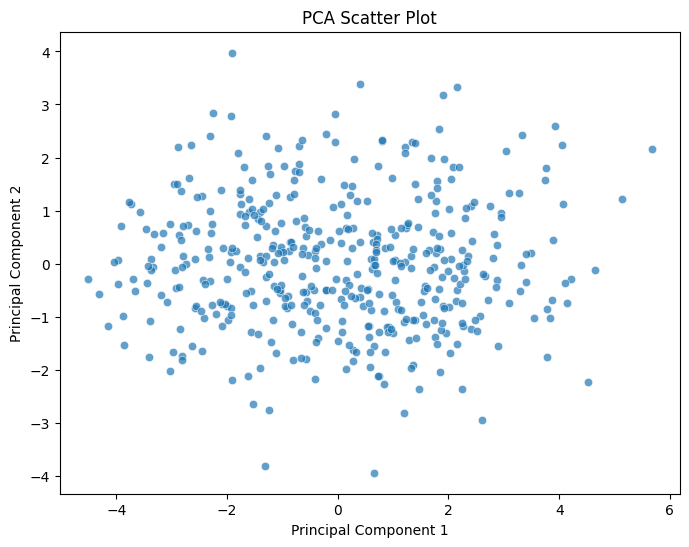

In [71]:
pca_result = perform_pca(initialize_data["scaled_data"], n_components=2)

## Correlation

This method computes the **correlation matrix** of the datasetand visualizes it using a heatmap.

In [72]:
def correlation_analysis(scaled_data):
  corr_matrix = pd.DataFrame(scaled_data).corr()

  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title("Correlation Matrix")
  plt.show()

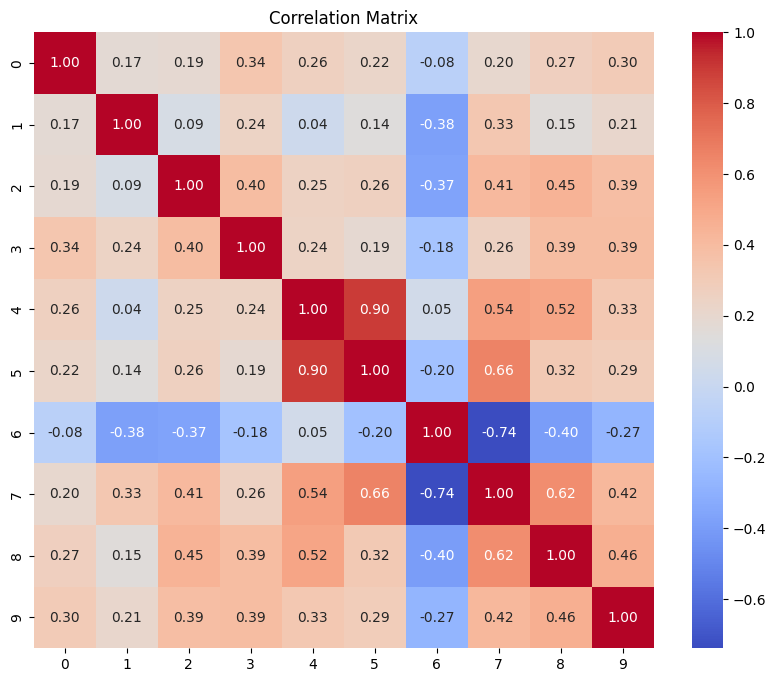

In [73]:
correlation = correlation_analysis(initialize_data["scaled_data"])

## Linear Regression Model
#### Parameters:
- x_col (str): The independent variable.
- y_col (str): The dependent variable.

This method fits a **simple linear regression** model and visualizes the relationship.

In [97]:
def regression_analysis(scaled_data, feature_idx):
    X_feature = scaled_data[:, feature_idx].reshape(-1, 1)
    y = diabetes.target

    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test.flatten(), y=y_test, alpha=0.7, label='Test Data')
    plt.plot(X_test.flatten(), y_pred, color='red', label='Regression Line')
    plt.legend()
    plt.title(f"Regression Analysis on Feature {feature_idx}: Predicted vs Actual")
    plt.xlabel(f"Feature {feature_idx}")
    plt.ylabel("Target (Diabetes Progression)")
    plt.show()

    return model

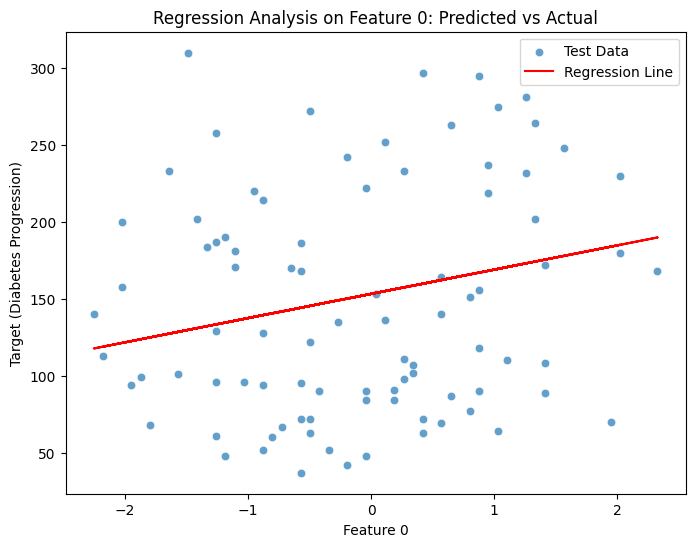

In [98]:
regression = regression_analysis(initialize_data["scaled_data"], feature_idx=0)

## Time Series ARIMA Model
#### Parameters:
- column (str): The column containing time series data.
- order (tuple): The ARIMA model order (p, d, q).

This method fits an **ARIMA model** to the given time series and visualizes the original and fitted values.

In [102]:
def time_series_analysis(scaled_data, feature_idx, order=(1, 1, 0)):
    ts_data = scaled_data[:, feature_idx]

    model = ARIMA(ts_data, order=order)
    model_fit = model.fit()

    plt.figure(figsize=(10, 6))
    plt.plot(ts_data, label='Original')
    plt.plot(model_fit.fittedvalues, color='red', label='Fitted')
    plt.legend()
    plt.title(f"Time Series Analysis on Feature {feature_idx}")
    plt.show()

    return model_fit

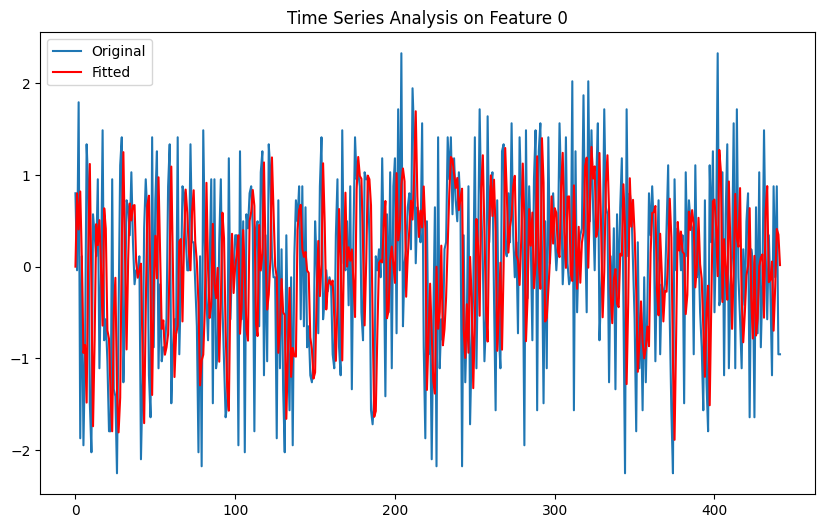

In [103]:
time_series_analysis(initialize_data["scaled_data"], feature_idx=0, order=(1, 1, 0))

In [104]:
def feature_importance_analysis(scaled_data, target_data):
    model = LinearRegression()
    model.fit(scaled_data, target_data)

    feature_importances = model.coef_

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances)
    plt.title("Feature Importance in Linear Regression")
    plt.xlabel("Feature Index")
    plt.ylabel("Importance")
    plt.show()

    return feature_importances

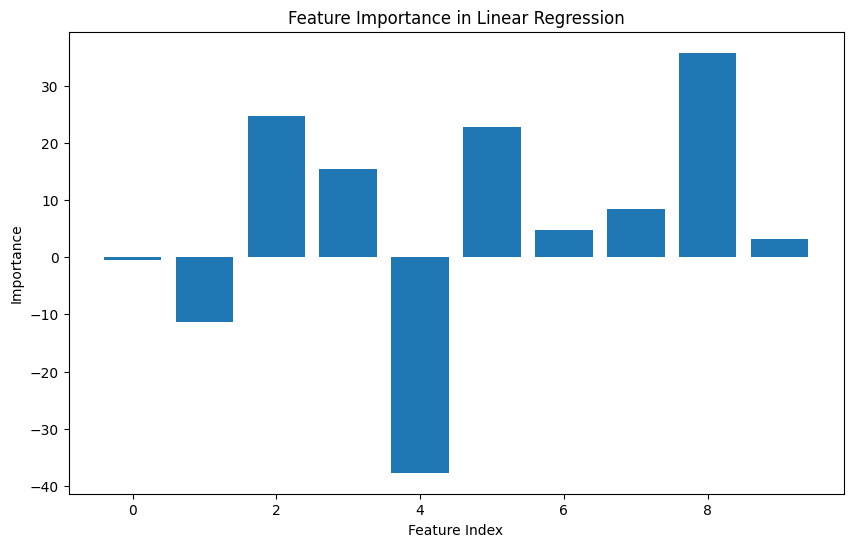

In [121]:
feature_importance = feature_importance_analysis(initialize_data["scaled_data"], diabetes.target)

In [106]:
from sklearn.model_selection import cross_val_score

def cross_validation(scaled_data, target_data, model, cv=5):
    scores = cross_val_score(model, scaled_data, target_data, cv=cv, scoring='neg_mean_squared_error')
    print(f"Cross-validation scores: {scores}")
    print(f"Mean score: {scores.mean()}")
    return scores

In [120]:
cv_scores = cross_validation(initialize_data["scaled_data"], diabetes.target, model=LinearRegression(), cv=5)

Cross-validation scores: [-2779.92344921 -3028.83633883 -3237.6875877  -3008.74648884
 -2910.21268776]
Mean score: -2993.081310469331


In [107]:
from sklearn.cluster import KMeans

def kmeans_clustering(scaled_data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)

    labels = kmeans.labels_
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=labels, palette="viridis")
    plt.title(f"K-Means Clustering (n_clusters={n_clusters})")
    plt.show()

    return labels

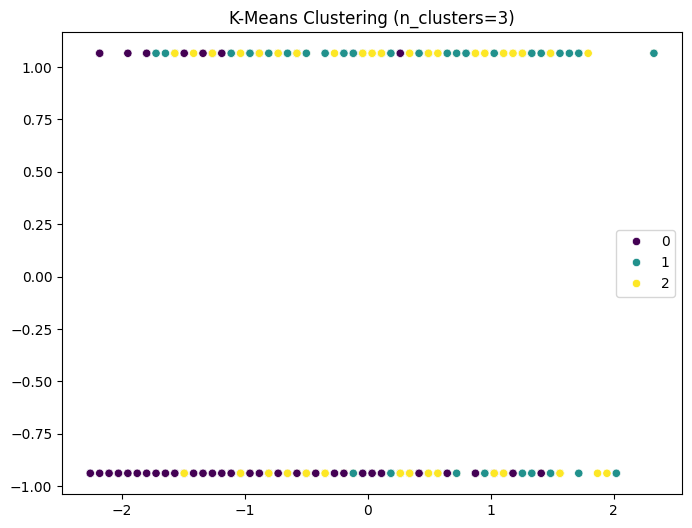

In [119]:
kmeans_labels = kmeans_clustering(initialize_data["scaled_data"], n_clusters=3)

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose

def time_series_decomposition(scaled_data, feature_idx, period=12):
    ts_data = scaled_data[:, feature_idx]

    decomposition = seasonal_decompose(ts_data, period=period)

    plt.figure(figsize=(10, 8))
    decomposition.plot()
    plt.suptitle(f"Time Series Decomposition of Feature {feature_idx}")
    plt.show()

    return decomposition

<Figure size 1000x800 with 0 Axes>

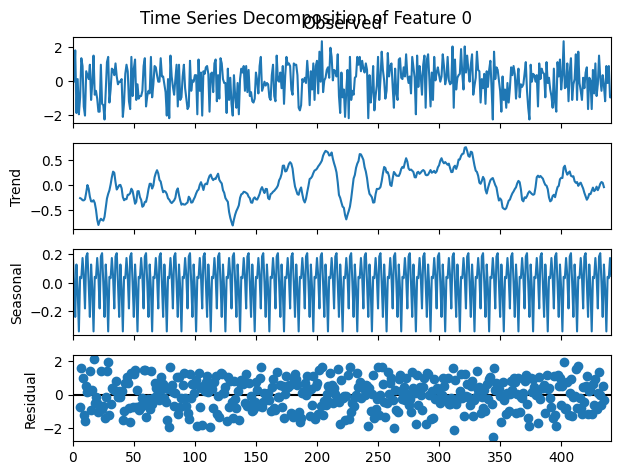

In [117]:
decomposition_result = time_series_decomposition(initialize_data["scaled_data"], feature_idx=0, period=12)

In [110]:
from scipy.stats import zscore

def detect_outliers(data):
    z_scores = zscore(data)
    outliers = np.where(np.abs(z_scores) > 3)  # 3 is the threshold for outliers
    return outliers

In [116]:
outliers = detect_outliers(initialize_data["scaled_data"][:, 0])  # Assuming you're checking the first feature

In [111]:
from sklearn.model_selection import train_test_split

def split_data(scaled_data, target_data, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, target_data, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [115]:
X_train, X_test, y_train, y_test = split_data(initialize_data["scaled_data"], diabetes.target, test_size=0.2)

In [112]:
def feature_target_correlation(scaled_data, target_data):
    corr_matrix = np.corrcoef(scaled_data.T, target_data)

    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix[:-1, -1:], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Between Features and Target")
    plt.show()

    return corr_matrix

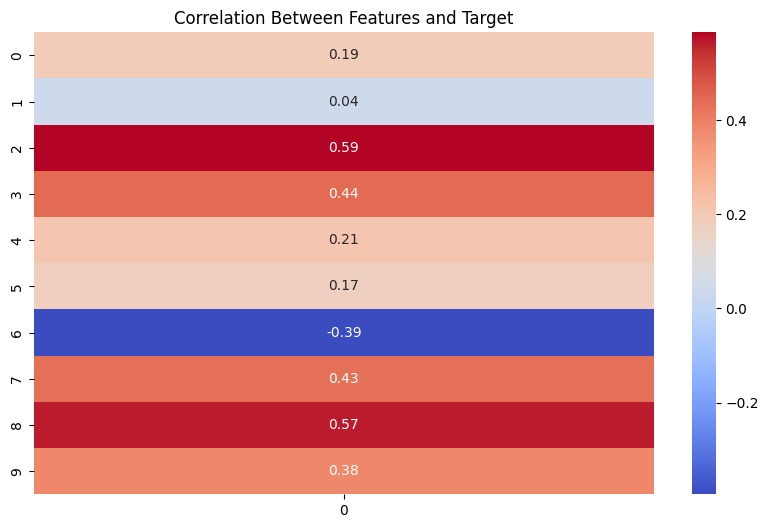

In [113]:
feature_target_corr = feature_target_correlation(initialize_data["scaled_data"], diabetes.target)